<a href="https://colab.research.google.com/github/kganesh1999/5292353_CAP5610_Assignment/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Import Libraries
import numpy as np
import pandas as pd
import random as rand
import seaborn as sns
import matplotlib.pyplot as plt

Question 5

In [ ]:
pos = np.array([[1, 1],[2, 2],[2,0]])
neg = np.array([[0,0],[1,0],[0,1]])
df_pos = pd.DataFrame(pos,columns=['x1','x2'])
df_neg = pd.DataFrame(neg,columns=['x1','x2'])

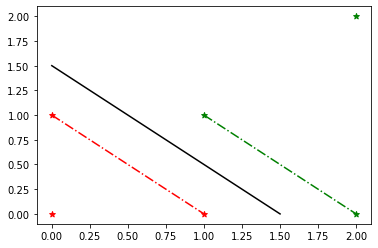

In [ ]:
plt.scatter(df_pos['x1'],df_pos['x2'], marker = '*', color='green')
plt.scatter(df_neg['x1'],df_neg['x2'], marker = '*', color='red')
x=[0,1]
y=[1,0]
x1=[1,2]
y1=[1,0]
px1 = [0,1,1.5]
px2 = [1.5,0.5,0]
plt.plot(x,y, linestyle= "-.", color='red')
plt.plot(x1,y1, linestyle= "-.", color='green')
plt.plot(px1,px2,color='black')
plt.show()

Question 6

In [ ]:
from sklearn.svm import SVC
pos= np.array([1,0,0])
neg = np.array([[1,0,0],[1,1.414,1],[1,-1.414,1]])
svc = SVC(kernel='linear')
svc.fit(neg,pos)
weights = svc.coef_
b = svc.intercept_
print('weights:', weights, 'bias:',b)

weights: [[ 0.00000000e+00 -1.01141206e-08 -1.00000000e+00]] bias: [4.28699424e-08]


Question 7

In [33]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

#Train Data Preprocessing 

In [34]:
#Dropping unwanted features
titanic_train.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [35]:
#Convert sex into binary variable (Male = 0 and Female =1)
bin = pd.get_dummies(titanic_train['Sex'])
titanic_train = pd.concat((bin,titanic_train),axis=1)
titanic_train.drop(['Sex','male'],axis=1,inplace=True)
titanic_train = titanic_train.rename(columns={"female":"Sex"})
titanic_train.head()

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C
2,1,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S
3,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S
4,0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S


In [36]:
#Filling missing values in Age feature 
mean=titanic_train['Age'].mean()
std=titanic_train['Age'].std()
titanic_train['Age'] = titanic_train['Age'].fillna(value=np.random.randint(mean-std, mean+std))
titanic_train['Age'].isna().sum()

0

In [37]:
#Filling missing values in Embarked feature
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)
titanic_train['Embarked'].isna().sum()

0

In [38]:
#Conversion of Numerical values in Fare column to ordinal values
def mask(data):
  if ((data >= -1.00) & (data <= 7.91)):
    return int(0)
  elif ((data > 7.91) & (data <= 14.454)):
    return int(1)
  elif ((data > 14.454) & (data <= 31.0)):
    return int(2)
  elif (data > 31.0):
    return int(3)
titanic_train['Fare'] = titanic_train['Fare'].apply(mask)

In [39]:

#Encoding Embarked values (S=1, C=2, Q=3)
encode_emb={'Embarked' : {"S":1,"C":2,"Q":3}}
titanic_train = titanic_train.replace(encode_emb)

In [40]:
#Create another feature 'IsAlone'
def boolean(data):
  if (data==0):
    return 1
  else:
    return 0
titanic_train['IsAlone'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_train['IsAlone'] = titanic_train['IsAlone'].apply(boolean)

In [41]:
#Drop PassengerID and Name
titanic_train.drop(['PassengerId','Name'],axis=1,inplace=True)

In [42]:
titanic_train.head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,0,3,22.0,1,0,0,1,0
1,1,1,1,38.0,1,0,3,2,0
2,1,1,3,26.0,0,0,1,1,1
3,1,1,1,35.0,1,0,3,1,0
4,0,0,3,35.0,0,0,1,1,1


In [43]:
titanic_train.isna().sum()

Sex         0
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

# Test Data Preprocessing


In [44]:
#Dropping unwanted features
titanic_test.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [45]:
#Convert sex into binary variable (Male = 0 and Female =1)
bin = pd.get_dummies(titanic_test['Sex'])
titanic_test = pd.concat((bin,titanic_test),axis=1)
titanic_test.drop(['Sex','male'],axis=1,inplace=True)
titanic_test = titanic_test.rename(columns={"female":"Sex"})

In [46]:
#Filling missing values in Fare feature
titanic_test['Fare'].fillna(titanic_test['Fare'].mode()[0],inplace=True)
titanic_test['Fare'].isna().sum()

0

In [47]:
#Filling missing values in Age feature 
mean = titanic_test['Age'].mean()
std = titanic_test['Age'].std()
titanic_test['Age'] = titanic_test['Age'].fillna(value=np.random.randint(mean-std, mean+std))
titanic_test['Age'].isna().sum()

0

In [48]:
#Filling missing values in Embarked feature
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0],inplace=True)
titanic_test['Embarked'].isna().sum()

0

In [49]:
#Conversion of Numerical values in Fare column to ordinal values
def mask(data):
  if ((data >= 0.00) & (data <= 7.91)):
    return int(0)
  elif ((data > 7.91) & (data <= 14.454)):
    return int(1)
  elif ((data > 14.454) & (data <= 31.0)):
    return int(2)
  elif (data > 31.0):
    return int(3)
titanic_test['Fare'] = titanic_test['Fare'].apply(mask)

In [50]:

#Encoding Embarked values (S=1, C=2, Q=3)
encode_emb={'Embarked' : {"S":1,"C":2,"Q":3}}
titanic_test = titanic_test.replace(encode_emb)

In [51]:
#Create another feature 'IsAlone'
def boolean(data):
  if (data==0):
    return 1
  else:
    return 0
titanic_test['IsAlone'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_test['IsAlone'] = titanic_test['IsAlone'].apply(boolean)

In [52]:
#Drop PassengerID and Name
titanic_test.drop(['PassengerId','Name'],axis=1,inplace=True)
titanic_test.head()

,Sex,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,34.5,0,0,0,3,1
1,1,3,47.0,1,0,0,1,0
2,0,2,62.0,0,0,1,3,1
3,0,3,27.0,0,0,1,1,1
4,1,3,22.0,1,1,1,1,0


In [53]:
titanic_test.isna().sum()

Sex         0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

In [54]:
titanic_train.corr()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
Sex,1.000000,0.543351,-0.131900,-0.060533,0.114631,0.245489,0.248940,0.116569,-0.303646
Survived,0.543351,1.000000,-0.338481,-0.034531,-0.035322,0.081629,0.295875,0.106811,-0.203367
Pclass,-0.131900,-0.338481,1.000000,-0.370293,0.083081,0.018443,-0.628459,0.045702,0.135207
Age,-0.060533,-0.034531,-0.370293,1.000000,-0.225338,-0.126687,0.126262,-0.100799,0.118036
SibSp,0.114631,-0.035322,0.083081,-0.225338,1.000000,0.414838,0.394248,-0.059961,-0.584471
Parch,0.245489,0.081629,0.018443,-0.126687,0.414838,1.000000,0.393048,-0.078665,-0.583398
Fare,0.248940,0.295875,-0.628459,0.126262,0.394248,0.393048,1.000000,-0.091096,-0.568942
Embarked,0.116569,0.106811,0.045702,-0.100799,-0.059961,-0.078665,-0.091096,1.000000,0.017807
IsAlone,-0.303646,-0.203367,0.135207,0.118036,-0.584471,-0.583398,-0.568942,0.017807,1.000000


#Data spliting (Train and test)

In [55]:
x_train = titanic_train[['Sex','Pclass','Age','SibSp','Parch','Fare','Embarked','IsAlone']].values
y_train = titanic_train['Survived'].values
x_test = titanic_test[['Sex','Pclass','Age','SibSp','Parch','Fare','Embarked','IsAlone']].values

In [56]:
x_train

array([[ 0.,  3., 22., ...,  0.,  1.,  0.],
       [ 1.,  1., 38., ...,  3.,  2.,  0.],
       [ 1.,  3., 26., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  3., 18., ...,  2.,  1.,  0.],
       [ 0.,  1., 26., ...,  2.,  2.,  1.],
       [ 0.,  3., 32., ...,  0.,  3.,  1.]])

In [57]:
x_test

array([[ 0. ,  3. , 34.5, ...,  0. ,  3. ,  1. ],
       [ 1. ,  3. , 47. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  2. , 62. , ...,  1. ,  3. ,  1. ],
       ...,
       [ 0. ,  3. , 38.5, ...,  0. ,  1. ,  1. ],
       [ 0. ,  3. , 27. , ...,  1. ,  1. ,  1. ],
       [ 0. ,  3. , 27. , ...,  2. ,  2. ,  0. ]])

# SVM cross-validation with various kernel

In [58]:
#Linear SVM 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
lsvm = SVC(kernel='linear',random_state=1)
lsvm_param = {'C':[0.01,0.1,1,10]}
gscv_lsvm = GridSearchCV(lsvm, lsvm_param, cv=5)
gscv_lsvm.fit(x_train, y_train)
best_parameters = gscv_lsvm.best_params_
print(best_parameters, gscv_lsvm.best_score_*100)

{'C': 0.1} 78.8977465319189


In [ ]:
#Polynomial kernel SVM 
poly = SVC(kernel='poly', degree= 2, random_state=1)
poly_param = {'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1]}
gscv_poly = GridSearchCV(poly, poly_param, cv=5)
gscv_poly.fit(x_train, y_train)
best_parameters = gscv_poly.best_params_
print(best_parameters, gscv_poly.best_score_*100)

In [61]:
#RBF kernel SVM 
rbf_svm = SVC(kernel='rbf', degree= 2, random_state=1)
rbf_param = {'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10]}
gscv_rbf_svm = GridSearchCV(rbf_svm, rbf_param, cv=5)
gscv_rbf_svm.fit(x_train, y_train)
best_parameters = gscv_rbf_svm.best_params_
print(best_parameters, gscv_rbf_svm.best_score_*100)

{'C': 10, 'gamma': 0.01} 82.49011361496453


In my case, Radial basis filter is best kernel for classification.